# Data preparation

## 1. Library and data import

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("OpenAlex_clean1.csv")

In [3]:
list(df.columns.values)

['Unnamed: 0',
 'id',
 'doi',
 'title',
 'publication_year',
 'language',
 'type',
 'countries_distinct_count',
 'institutions_distinct_count',
 'fwci',
 'primary_location.source.display_name',
 'primary_location.source.type',
 'primary_topic.display_name',
 'primary_topic.subfield.display_name',
 'primary_topic.field.display_name',
 'primary_topic.domain.display_name',
 'authorships.author_position',
 'authorships.institutions',
 'authorships.countries',
 'authorships.author.display_name',
 'authorships.raw_affiliation_strings',
 'topics.display_name',
 'topics.subfield.display_name',
 'topics.domain.display_name',
 'keywords.display_name',
 'funders.id',
 'funders.display_name']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351758 entries, 0 to 351757
Data columns (total 27 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            351758 non-null  int64  
 1   id                                    351758 non-null  object 
 2   doi                                   345826 non-null  object 
 3   title                                 351600 non-null  object 
 4   publication_year                      351722 non-null  object 
 5   language                              350987 non-null  object 
 6   type                                  351722 non-null  object 
 7   countries_distinct_count              351719 non-null  float64
 8   institutions_distinct_count           351719 non-null  float64
 9   fwci                                  351458 non-null  float64
 10  primary_location.source.display_name  340082 non-null  object 
 11  

## 2. Funder column manipulation

In [5]:
df['funders.display_name'].unique()

array([nan,
       'Amgen|Institut National de la Santé et de la Recherche Médicale|Centre National de la Recherche Scientifique|National Institutes of Health',
       'European Commission', ...,
       'U.S. Department of Energy|Scottish Universities Physics Alliance|National Research Foundation of Korea|Centre National de la Recherche Scientifique|Science and Technology Facilities Council|Fondo Nacional de Desarrollo Científico y Tecnológico',
       'National Science Foundation|Fulbright Association|Agence Nationale de la Recherche',
       'Human Frontier Science Program|Biotechnology and Biological Sciences Research Council'],
      shape=(44662,), dtype=object)

### 2.1 Funders count

In [6]:
df['funders_count'] = 0

# Iterate over the rows and count the number of funders
for index, funder in df['funders.display_name'].items():
    if pd.notna(funder):
        funders = funder.split('|')
        df.at[index, 'funders_count'] = len(funders)
    else:
        df.at[index, 'funders_count'] = 0

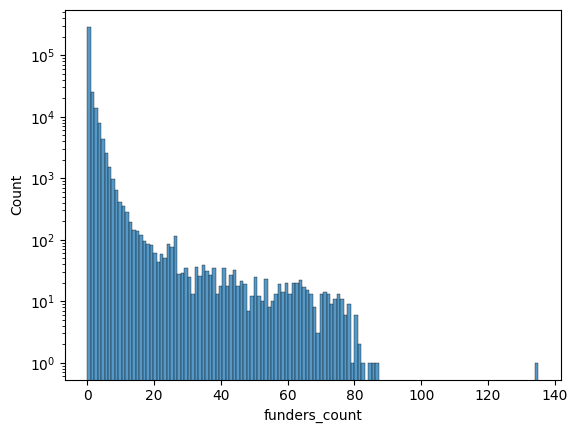

In [7]:
sns.histplot(x = df['funders_count'], bins=130)
plt.yscale("log")
plt.show()

In [ ]:
df['funders_count'].max()

### 2.2 Funders binary

In [8]:
df['funders_bin'] = 0
for index, funder in df['funders_count'].items():
    if funder == 0:
        df.at[index, 'funders_bin'] = 0
    else:
        df.at[index, 'funders_bin'] = 1

<Axes: xlabel='funders_bin', ylabel='count'>

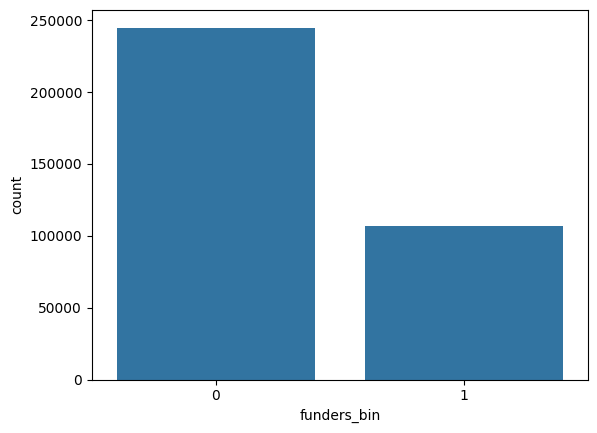

In [9]:
sns.countplot(x=df['funders_bin'])

## 3. Save csv

In [11]:
df.to_csv("OpenAlex_clean2.csv", sep=",")